# Generate a product dependency graph from ODC DEA product

In [2]:
import string
from graphviz import Digraph
import datacube
dc = datacube.Datacube()

# Get Candidate Product UUID

In [3]:
for i in dc.list_products().name:
    print(i)

bom_rainfall_grids
dsm
dsm1sv10
fc_percentile_albers_annual
ga_ls5t_ard_3
ga_ls5t_level1_3
ga_ls7e_ard_3
ga_ls7e_level1_3
ga_ls8c_ard_3
ga_ls8c_level1_3
gamma_ray
high_tide_comp_20p
high_tide_comp_count
item_v2
item_v2_conf
landsat_barest_earth
low_tide_comp_20p
low_tide_comp_count
ls5_fc_albers
ls5_level1_scene
ls5_nbar_albers
ls5_nbar_scene
ls5_nbart_albers
ls5_nbart_geomedian_annual
ls5_nbart_scene
ls5_nbart_tmad_annual
ls5_pq_albers
ls5_pq_legacy_scene
ls5_pq_scene
ls5_satellite_telemetry_data
ls5_usgs_l2c1
ls7_fc_albers
ls7_level1_scene
ls7_nbar_albers
ls7_nbar_scene
ls7_nbart_albers
ls7_nbart_geomedian_annual
ls7_nbart_scene
ls7_nbart_tmad_annual
ls7_pq_albers
ls7_pq_legacy_scene
ls7_pq_scene
ls7_satellite_telemetry_data
ls7_usgs_l2c1
ls8_barest_earth_mosaic
ls8_fc_albers
ls8_level1_oli_scene
ls8_level1_scene
ls8_nbar_albers
ls8_nbar_oli_albers
ls8_nbar_oli_scene
ls8_nbar_scene
ls8_nbart_albers
ls8_nbart_geomedian_annual
ls8_nbart_oli_albers
ls8_nbart_oli_scene
ls8_nbart_scene
ls

In [4]:
def get_sample_product_id(product):
    # get a sample id to represent the product
    sample_id = dc.index.datasets.search_eager(product=product)[0].metadata_doc['id']
    return(sample_id)

In [5]:
def get_source_product(sample_id):
    # retrieve a sample metadata source using the sample_id but with sources included (excluded by default)
    sample_md = dc.index.datasets.get(sample_id, include_sources=True)
   
    sources_dict = {}
    product_list = []
    
    for i in sample_md.sources:
        
        sources_dict[sample_md.sources[i].type.name] = str(sample_md.sources[i].id)
        
    return(({sample_md.type.name: list(set(sources_dict))} , sources_dict))
    

In [6]:
# Example execution to seed graph with product of choice
product_id = get_sample_product_id('high_tide_comp_20p')

In [7]:
# Manually manufacture a candidate product UUID for a list of products
product_list = ['fc_percentile_albers_annual',
'ga_ls5t_ard_3',
'ga_ls7e_ard_3',
'ga_ls8c_ard_3',
'high_tide_comp_20p',
'high_tide_comp_count',
'item_v2',
'item_v2_conf',
'landsat_barest_earth',
'low_tide_comp_20p',
'low_tide_comp_count',
'ls5_fc_albers',
'ls5_nbart_geomedian_annual',
'ls5_nbart_tmad_annual',
'ls7_fc_albers',
'ls7_nbart_geomedian_annual',
'ls7_nbart_tmad_annual',
'ls8_barest_earth_mosaic',
'ls8_fc_albers',
'ls8_nbart_geomedian_annual',
'ls8_nbart_tmad_annual',
'mangrove_extent_cover_albers',
'pq_count_annual_summary',
'pq_count_summary',
's2a_ard_granule',
's2b_ard_granule',
's2_tsmask',
'urban_areas',
'wofs_albers',
'wofs_annual_summary',
'wofs_apr_oct_summary',
'wofs_filtered_summary',
'wofs_nov_mar_summary',
'wofs_summary']

In [10]:
# Manually manufacture a candidate product UUID for a list of products
product_list = [
'wofs_annual_summary',
'wofs_apr_oct_summary',
'wofs_filtered_summary',
'wofs_nov_mar_summary',
'wofs_summary']

In [11]:
# Run this to generate UUIDs for the list of product created above
# WARNING! takes forever as no shortcut to only search for a representative UUID in a common way

product_id_list = []
for product in product_list:
    print([product, get_sample_product_id(product)])
    product_id_list.append([product, get_sample_product_id(product)])

['wofs_annual_summary', '799b0523-e781-465c-992e-61a9b39958b6']
['wofs_apr_oct_summary', 'a16f6884-0030-4c8c-8bd4-60186a371b02']
['wofs_filtered_summary', 'b2a28cbb-e365-4834-9022-ac592bd2ece5']
['wofs_nov_mar_summary', '25680247-14a5-4899-aa84-83b701d321d2']
['wofs_summary', '3a8b2da2-c4da-409d-a28e-fd69484d9a69']


In [12]:
product_id_list = [['fc_percentile_albers_annual', '95c5422c-d365-4b2f-b46c-b0e06b71df29'],
['ga_ls5t_ard_3', '5c62b16d-1ecd-467e-a3de-e44cb364eb08'],
['ga_ls7e_ard_3', 'def1b897-9421-41c5-8110-3a4c38c2f3a0'],
['ga_ls8c_ard_3', 'f055bcf0-29be-422e-abd5-4afa98854b0a'],
['high_tide_comp_20p', 'c017d16f-cd4a-4c31-af1b-d91dac822cc4'],
['high_tide_comp_count', 'c5b047c9-03ab-458c-ac8e-8c23ba0553a9'],
['item_v2', '188872ce-5ef7-4fd6-bcb7-08580297b7d3'],
['item_v2_conf', 'bde6b1d7-a555-4416-a003-16080a019531'],
['landsat_barest_earth', '974f5c4a-0870-4c08-bf9e-4efe1957e664'],
['low_tide_comp_20p', '1978616f-4ee2-4757-ab3b-6a5c4106d797'],
['low_tide_comp_count', '84004e8c-6abb-4b0f-8287-378846850731'],
['ls5_fc_albers', 'ab1fc88d-dafb-4334-8732-bd27ef18c0fe'],
['ls5_nbart_geomedian_annual', 'ddb2f1c5-ced1-442d-b770-c24d3e8294c1'],
['ls5_nbart_tmad_annual', 'c205d519-0cf7-4136-a227-e51f60573e16'],
['ls7_fc_albers', '4a164e17-771c-4591-961b-f732735c67e9'],
['ls7_nbart_geomedian_annual', 'a762194e-0190-44cc-8215-af98cf66fd5b'],
['ls7_nbart_tmad_annual', '96eab276-b315-4e02-b7e7-f34cc0f82aa5'],
['ls8_barest_earth_mosaic', 'fff650bc-0997-4981-8e5c-0d8f9dc08a31'],
['ls8_fc_albers', '47ebfabb-b433-4c04-b7c9-b5fcc5bba428'],
['ls8_nbart_geomedian_annual', '8e3b09d0-1336-4c32-a26c-822f67d80af4'],
['ls8_nbart_tmad_annual', '6b92d4f3-17ce-4cb0-a8fd-f1f994c28541'],
['mangrove_extent_cover_albers', 'fcd8f632-eaee-4111-8740-7545bdee9502'],
['pq_count_annual_summary', '31d61ed9-911a-4afd-aa35-acbdc2f370c7'],
['pq_count_summary', '9a78baba-1360-4e6c-8059-f25a3aaf85ca'],
['s2_tsmask', 'a614223a-d4a7-4089-8dcb-bc8b991a9235'],
['urban_areas', '3355bd3f-d4ca-4350-97a5-c1d0d5209d58'],
['wofs_annual_summary', '799b0523-e781-465c-992e-61a9b39958b6'],
['wofs_apr_oct_summary', 'a16f6884-0030-4c8c-8bd4-60186a371b02'],
['wofs_filtered_summary', 'b2a28cbb-e365-4834-9022-ac592bd2ece5'],
['wofs_nov_mar_summary', '25680247-14a5-4899-aa84-83b701d321d2'],
['wofs_summary', '3a8b2da2-c4da-409d-a28e-fd69484d9a69']]

In [20]:
def get_product_graph(product_id):
    id_list = []
    sources_list = []
    # get an initial set of UUIDs
    tree, sources_dict = get_source_product(product_id)

    # for each UUID - get their decendent UUID and work up the tree until no sources returned
    for source in sources_dict:
        id_list.append(sources_dict[source])
    sources_list.append(tree)

    # while requests for source products return results i.e. not {},
    while len(id_list) != 0:

        # for each UUID in the list
        for i in id_list:        
            id_list.remove(i)

            tree, sources_dict = get_source_product(i)
            if tree not in sources_list:
                sources_list.append(tree)
            if not sources_dict == {}: 
                for source in sources_dict:
                    id_list.append(sources_dict[source])

    alphabet = string.ascii_uppercase
    count = 0
    dot_list = []
    dot = Digraph(comment='DEA Product Dependency Graphviz')
    index_alpha = {}
    for i in sources_list:
        index_alpha[list(i.keys())[0]] = alphabet[count]
        dot_list.append((alphabet[count], list(i.keys())[0]))
        dot.node(alphabet[count], list(i.keys())[0])
        count = count+1
    dot_edges = []
    for source in sources_list:
        #print(source)
        for i in source[list(source.keys())[0]]:
            if not i == None: 
                dot_edges.append(index_alpha[i]+index_alpha[list(source.keys())[0]])
    dot.edges(dot_edges)
    return(dot, tree_all)

In [35]:
for i in product_id_list:
    dot = get_product_graph(i[1])
    dot.render(i[0]+'.gv', view=True) 

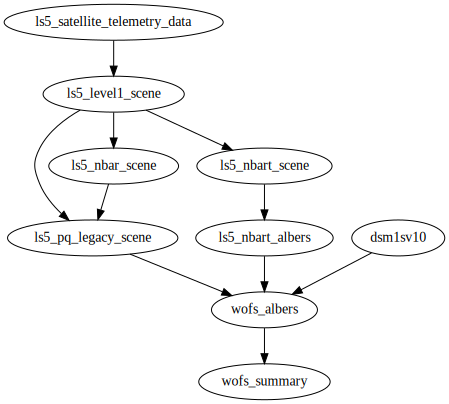

In [36]:
dot

In [ ]:
# TODO Build giant tree of all products
# build on tree information looping through product_id_list
# what to do with alphabet limit - will be exceeded